In [1]:
from util import *
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# EDA visualisations for the report

Focused on more basic analysis, feature distributions, etc.

In [2]:
# Change to directory of dataset file
# Dataset file is guaranteed to have all days for all stocks, i.e. shift(30) is guaranteed to be 30 calendar days
# This leaves a lot of NaNs to be filled
path = "~/s3local/sentimentgroup/datasets/roberta_sources.parquet"

In [3]:
# Horizons to calculate future returns (e.g. price after N days)
target_horizons = [1, 3, 5, 10, 30]
# Horizons to calculate lookbacks for rolling means (e.g. mean sentiment over last N days)
lookback_periods = [10, 20, 30, 40]
# Enable to add residualised returns as a target 
# Also known as idiosyncratic returns, ie individual stock returns after removing overall market trends 
# Takes about 60 seconds per target horizon, so disable if not needed
residualise_returns = False

# Date range, leave None to use all available data (where we have prices)
start_date = "2014-01-01"
end_date = "2022-01-01" # Keep out of sample for now
df = load_dataset(
    path,
    target_horizons = target_horizons,
    lookback_periods = lookback_periods,
    residualise_returns = residualise_returns,
    start_date=start_date,
    end_date=end_date,
    sources=True,
)

100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


*Analysing correlations between signals and target returns.*

We are trying to see which input features have the strongest predictive effect in sample (pre 2022) and use those correlations to inform a basic trading strategy.

Text(0.5, 1.0, 'r/worldnews Comment Sentiment - different stock popularity')

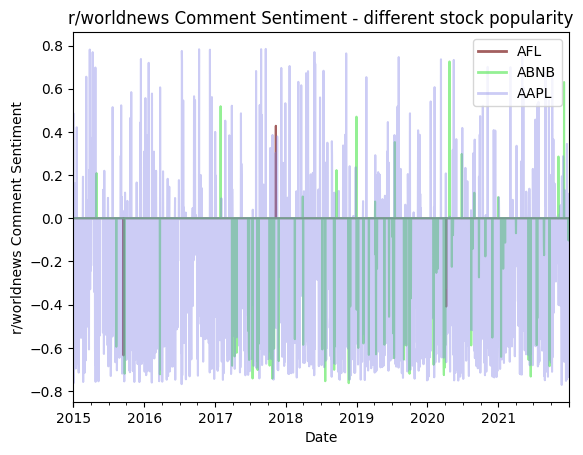

In [54]:
# Plot comparing more/less controversial stocks from reddit 
from matplotlib.lines import Line2D
afl = df[df.symbol == 'AFL'][['dt', 'ft_comments_worldnews']].copy()
abnb = df[df.symbol == 'ABNB'][['dt', 'ft_comments_worldnews']].copy()
aapl = df[df.symbol == 'AAPL'][['dt', 'ft_comments_worldnews']].copy()
colors = [(0.6, 0.3, 0.3, 0.9), (0.3, 0.9, 0.3, 0.6), (0.5, 0.5, 0.9, 0.4)]
joined = afl.merge(abnb, on='dt', suffixes=['_afl', '_abnb']).merge(aapl, on='dt').rename(columns={'ft_comments_worldnews': 'ft_comments_worldnews_aapl'})
ax = joined.plot(x='dt', y=['ft_comments_worldnews_afl', 'ft_comments_worldnews_abnb', 'ft_comments_worldnews_aapl'], legend=False, color=colors)
ax.legend([
    Line2D([0], [0], color=colors[0], lw=2),
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
], ['AFL', 'ABNB', 'AAPL'])
ax.set_xlabel("Date")
ax.set_ylabel("r/worldnews Comment Sentiment")
ax.set_title("r/worldnews Comment Sentiment - different stock popularity")

Text(0.5, 1.0, 'r/worldnews 30 Day Avg Comment Sentiment - different stock popularity')

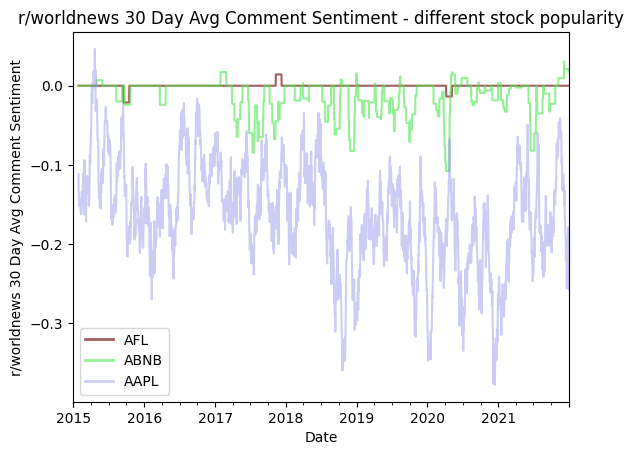

In [57]:
# Plot comparing more/less controversial stocks from reddit, showing the impact on normalised features
from matplotlib.lines import Line2D
afl = df[df.symbol == 'AFL'][['dt', 'ft_comments_worldnews']].copy()
afl['ft_comments_worldnews'] = afl.ft_comments_worldnews.rolling(30).mean()
abnb = df[df.symbol == 'ABNB'][['dt', 'ft_comments_worldnews']].copy()
abnb['ft_comments_worldnews'] = abnb.ft_comments_worldnews.rolling(30).mean()
aapl = df[df.symbol == 'AAPL'][['dt', 'ft_comments_worldnews']].copy()
aapl['ft_comments_worldnews'] = aapl.ft_comments_worldnews.rolling(30).mean()
colors = [(0.6, 0.3, 0.3, 0.9), (0.3, 0.9, 0.3, 0.6), (0.5, 0.5, 0.9, 0.4)]
joined = afl.merge(abnb, on='dt', suffixes=['_afl', '_abnb']).merge(aapl, on='dt').rename(columns={'ft_comments_worldnews': 'ft_comments_worldnews_aapl'})
ax = joined.plot(x='dt', y=['ft_comments_worldnews_afl', 'ft_comments_worldnews_abnb', 'ft_comments_worldnews_aapl'], legend=False, color=colors)
ax.legend([
    Line2D([0], [0], color=colors[0], lw=2),
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
], ['AFL', 'ABNB', 'AAPL'])
ax.set_xlabel("Date")
ax.set_ylabel("r/worldnews 30 Day Avg Comment Sentiment")
ax.set_title("r/worldnews 30 Day Avg Comment Sentiment - different stock popularity")

Text(0.5, 1.0, 'r/worldnews 30 Day (Normalised) - different stock popularity')

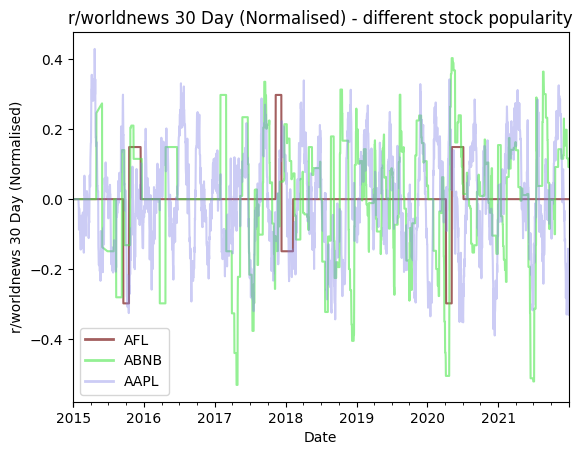

In [61]:
# Plot introducing normalised features
from matplotlib.lines import Line2D
afl = df[df.symbol == 'AFL'][['dt', 'ft_comments_worldnews_30']].copy()
abnb = df[df.symbol == 'ABNB'][['dt', 'ft_comments_worldnews_30']].copy()
aapl = df[df.symbol == 'AAPL'][['dt', 'ft_comments_worldnews_30']].copy()
colors = [(0.6, 0.3, 0.3, 0.9), (0.3, 0.9, 0.3, 0.6), (0.5, 0.5, 0.9, 0.4)]
joined = afl.merge(abnb, on='dt', suffixes=['_afl', '_abnb']).merge(aapl, on='dt').rename(columns={'ft_comments_worldnews_30': 'ft_comments_worldnews_30_aapl'})
ax = joined.plot(x='dt', y=['ft_comments_worldnews_30_afl', 'ft_comments_worldnews_30_abnb', 'ft_comments_worldnews_30_aapl'], legend=False, color=colors)
ax.legend([
    Line2D([0], [0], color=colors[0], lw=2),
    Line2D([0], [0], color=colors[1], lw=2),
    Line2D([0], [0], color=colors[2], lw=2),
], ['AFL', 'ABNB', 'AAPL'])
ax.set_xlabel("Date")
ax.set_ylabel("r/worldnews 30 Day (Normalised)")
ax.set_title("r/worldnews 30 Day (Normalised) - different stock popularity")

In [92]:
# Plot differences in sentiment features
df['ft_comments'] = df[[c for c in df.columns if c.startswith('ft_comments_') and not c.endswith('0')]].mean(axis=1)
df['ft_submissions'] = df[[c for c in df.columns if c.startswith('ft_submissions_') and not c.endswith('0')]].mean(axis=1)
df['ft_news'] = df[[c for c in df.columns if c.startswith('ft_news_') and not c.endswith('0')]].mean(axis=1)

<Axes: >

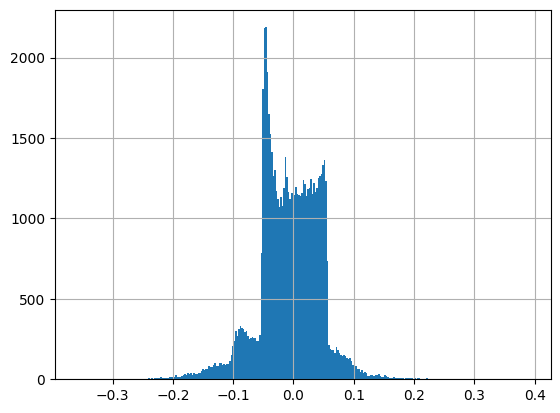

In [95]:
df[df.ft_submissions != 0].ft_submissions.hist(bins=300)

### Plotting distributions of sentiment scores by source/etc

Text(0.5, 0, 'Sentiment Score (-1 to +1)')

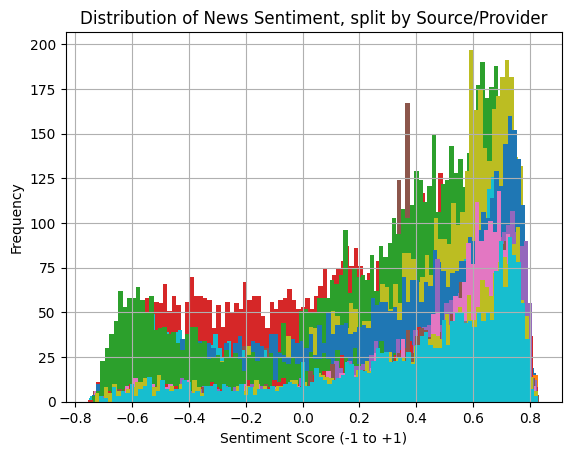

In [100]:
for c in df.columns:
    if c.startswith('ft_news_') and not c.endswith('0'):
        df[df[c] != 0][c].hist(bins=100)
plt.title("Distribution of News Sentiment, split by Source/Provider")
plt.ylabel("Frequency")
plt.xlabel("Sentiment Score (-1 to +1)")

Text(0.5, 0, 'Sentiment Score (-1 to +1)')

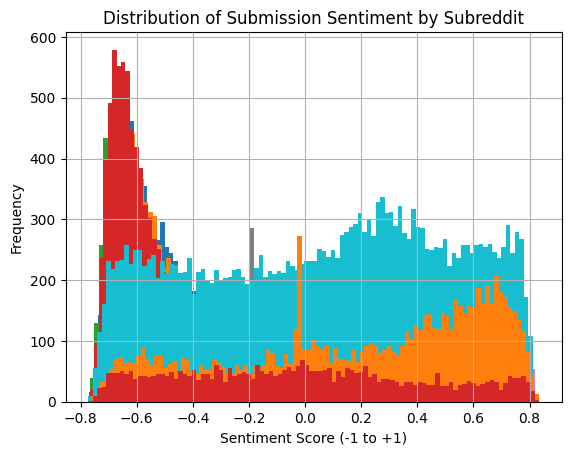

In [111]:
for c in df.columns:
    if c.startswith('ft_submissions_') and not c.endswith('0'):
        df[df[c] != 0][c].hist(bins=100)
plt.title("Distribution of Submission Sentiment by Subreddit")
plt.ylabel("Frequency")
plt.xlabel("Sentiment Score (-1 to +1)")

Text(0.5, 0, 'Sentiment Score (-1 to +1)')

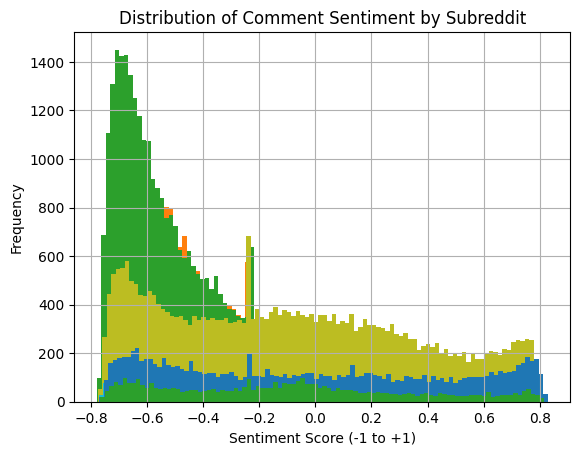

In [112]:
for c in df.columns:
    if c.startswith('ft_comments_') and not c.endswith('0'):
        df[df[c] != 0][c].hist(bins=100)
plt.title("Distribution of Comment Sentiment by Subreddit")
plt.ylabel("Frequency")
plt.xlabel("Sentiment Score (-1 to +1)")

In [109]:
# Find subreddits with low mean vs higher mean (the low peaks vs even distribution above)
subreddit_means = []
for c in df.columns:
    if c.startswith("ft_submissions_") and not c.endswith("0"):
        subreddit_means.append((c.split('_')[-1], df[c].mean()))
subreddit_means = sorted(subreddit_means, key=lambda x: x[1])
subreddit_means

[('politics', -0.00302262561305721),
 ('news', -0.0026418636470731775),
 ('worldnews', -0.0025284795791921926),
 ('technology', -0.0016862533099470075),
 ('Superstonk', -4.817716459465323e-05),
 ('finance', 5.7126237175458955e-06),
 ('financialindependence', 9.097892975596785e-05),
 ('Daytrading', 0.0001531529255527107),
 ('UpliftingNews', 0.0002905336643380016),
 ('investing', 0.00036790187575374276),
 ('StockMarket', 0.00048701457235479574),
 ('Bitcoin', 0.000593199101199477),
 ('wallstreetbets', 0.0012136871556300702),
 ('CryptoCurrency', 0.0013535763037962835)]

In [110]:
# Find subreddits with low mean vs higher mean (the low peaks vs even distribution above)
subreddit_means = []
for c in df.columns:
    if c.startswith("ft_comments_") and not c.endswith("0"):
        subreddit_means.append((c.split('_')[-1], df[c].mean()))
subreddit_means = sorted(subreddit_means, key=lambda x: x[1])
subreddit_means

[('news', -0.009890611997140338),
 ('worldnews', -0.008505451844371195),
 ('technology', -0.0037301270511647085),
 ('wallstreetbets', -0.0021769685733119513),
 ('investing', -0.0008551234578483412),
 ('Bitcoin', -0.0008076704478441949),
 ('UpliftingNews', -0.000540372242751048),
 ('Superstonk', -0.00036199689947059816),
 ('finance', -0.00020084549103573633),
 ('CryptoCurrency', -0.0001830045621194886),
 ('StockMarket', -9.051651493939632e-05),
 ('Daytrading', 4.716259450818843e-05),
 ('financialindependence', 0.00017531255345188995)]